# Assignment - 2


<b> Here is the assignment question:
<img src="Assignment-2.PNG" style="width:550px;height:550px;">

In [102]:
# Packages
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(1) 

# Initial displacement

In [104]:
# Given
Fst = 150*1000 # in N
E = 29*10**9 
A = 0.40*0.40

du0 = 0.15 # initial velocity in m/sec


#---- From assignment-1

ω = 347.596  # circular frequency ω from Assignment-1 for fixed end
L = 3.405  # from assignment-1, which is height of the columns

<b><u> Initial displacement

In [105]:
# u0 = PL/AE
u0 = (Fst*L)/(A*E)  # in m
u0

0.00011007543103448273

# Case-I: Free undamped vibration

<b> <u> Free undamped vibration:</u></b>
   
 u(t) = $\frac{du_0} {\omega}sin(\omega t) + u_0 cos(\omega t)$ 
 <br> <br>
 du(t) = $du_0 cos(\omega t) - \omega u_0 sin(\omega t)$

In [98]:
# ut =  (du0/ω)*sin(ω*t)+u0*cos(ω*t)
def Free_undamped_vibration(t):
    ut = (du0/ω)*np.sin(ω*t)+u0*np.cos(ω*t)
    dut = du0*np.cos(ω*t)-ω*u0*np.sin(ω*t)
    
    return ut, dut

## Displacement u and the velocity u΄ at the time t=0.2 sec.

In [99]:
result = Free_undamped_vibration(0.2)
print("Displacement at t = 0.2 second is: " + str(result[0]))
print("Velocity at t = 0.2 second is: " + str(result[1]))

Displacement at t = 0.2 second is: 0.00027090740423944457
Velocity at t = 0.2 second is: 0.1228684908794529


## Displacement and velocity versus time plot

In [115]:
u1=[]
du1=[]
t1=[]
for i in range (1, 1500):
    tm = i/10000
    t1.append(tm)
    u1.append(Free_undamped_vibration(tm)[0])
    du1.append(Free_undamped_vibration(tm)[1])

# u = Free_undamped_vibration(t)[0]
# du=Free_undamped_vibration(t)[1]

## Plot

### On the same figure

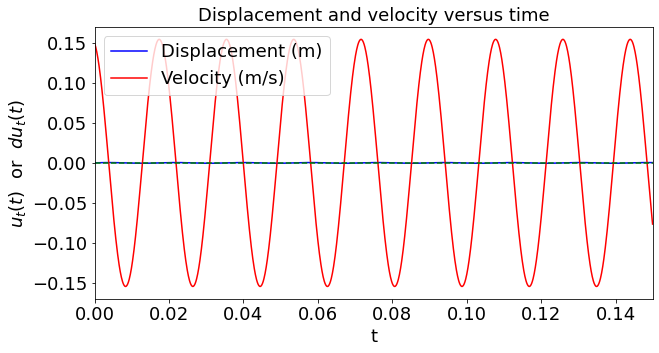

In [116]:
#-----PLOT
plt.figure(figsize=(10,5))  # plot size
fontsz = 18
lm = np.max(t1)
# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

# font size
plt.rcParams['font.size'] = '18'  # font size of axis label

plt.plot(t1, u1, label='Displacement (m)', c='b')
plt.plot(t1, du1, label='Velocity (m/s)', c='r')
plt.xlabel(r't', fontsize = fontsz)
plt.ylabel(r'$u_{t} (t)$'+'  or  '+r'$du_{t} (t)$', fontsize = fontsz)

plt.legend(loc="best", fontsize=fontsz)
plt.title('Displacement and velocity versus time', fontsize=fontsz)


x = [0, np.max(t1)]    
y = [0, 0]
plt.plot(x, y, 'g--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(du1), 1.1*np.max(du1)])

plt.show();

### Separate figure

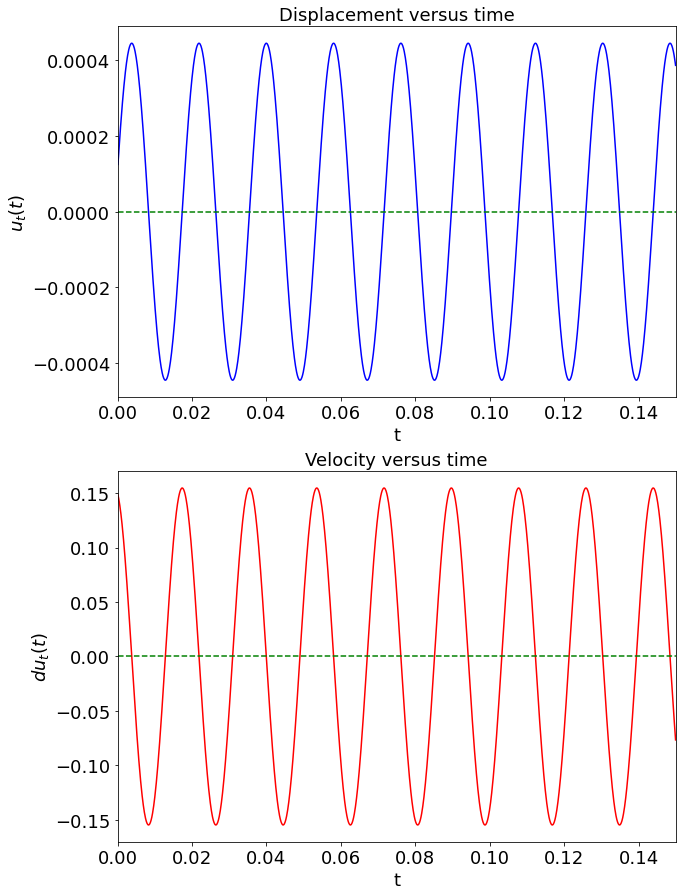

In [117]:
#-----PLOT
plt.figure(figsize=(10,15))  # plot size
fontsz = 18

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.subplot(2, 1, 1)
plt.plot(t1, u1, c='b')
plt.xlabel(r't', fontsize = fontsz)
plt.ylabel(r'$u_{t} (t)$', fontsize = fontsz)
plt.title('Displacement versus time', fontsize=fontsz)


x = [0, np.max(t1)]    
y = [0, 0]
plt.plot(x, y, 'g--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(u1), 1.1*np.max(u1)])


#------------------------------
plt.subplot(2, 1, 2)
plt.plot(t1, du1, c='r')
plt.xlabel(r't', fontsize = fontsz)
plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Velocity versus time', fontsize=fontsz)

x = [0, lm]    
y = [0, 0]
plt.plot(x, y, 'g--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(du1), 1.1*np.max(du1)])

plt.show();


# Case II: Damped free vibration

<b> <u> Free damped vibration:</u></b>
   
 u(t) = $e^-ζωt (Acos(ω_d t)+Bsin(ω_d t))$
 <br> <br>
 du(t) = $e^-ζωt [(Bω_d -ζωA)cos(ω_d t)-(Aω_d + ζωB) sin(ω_d t)] $

ζ: Damping coefficeint <br>
$ω_d$: Damped natural frequency

## Displacement u and the velocity u΄ at the time t=0.2 sec.

In [118]:
# With damping, with ζ=5%. The vibration is free, damped vibration

In [119]:
# Damped free vibration
ζ = 0.05
ωd = ω*(1-ζ**2)**0.5

A = u0; 
B = (du0+u0*ζ*ω)/ωd

def Free_damped_vibration(t):
    ut = np.exp(-1*ζ*ω*t)*(A*np.cos(ωd*t)+B*np.sin(ωd*t))
    dut = np.exp(-1*ζ*ω*t)*((B*ωd-ζ*ω*A)*np.cos(ωd*t)-
                            (A*ωd+ζ*ω*B)*np.sin(ωd*t))
    
    return ut, dut

In [120]:
result_damped = Free_damped_vibration(0.2)
print("Displacement at t = 0.2 second is: " + str(result_damped[0]))
print("Velocity at t = 0.2 second is: " + str(result_damped[1]))

Displacement at t = 0.2 second is: 7.456921796852667e-06
Velocity at t = 0.2 second is: 0.003966265869083157


## Displacement and velocity versus time plot

In [121]:
# t = [x/100 for x in range(1,5000)]
# t

In [126]:
u2=[]
du2=[]
t2=[]
for i in range (1, 150):
    tm = i/1000
    t2.append(tm)
    u2.append(Free_damped_vibration(tm)[0])
    du2.append(Free_damped_vibration(tm)[1])

# u = Free_undamped_vibration(t)[0]
# du=Free_undamped_vibration(t)[1]

## Plot

### On the same figure

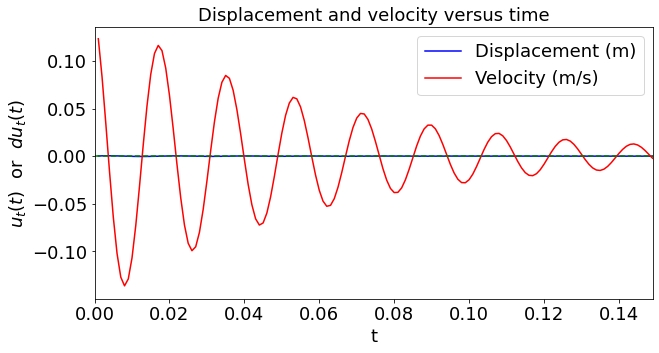

In [127]:
#-----PLOT
plt.figure(figsize=(10,5))  # plot size
fontsz = 18
lm = np.max(t2)

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR


# font size
plt.rcParams['font.size'] = '18'  # font size of axis label

plt.plot(t2, u2, label='Displacement (m)', c='b')
plt.plot(t2, du2, label='Velocity (m/s)', c='r')
plt.xlabel(r't', fontsize = fontsz)
plt.ylabel(r'$u_{t} (t)$'+'  or  '+r'$du_{t} (t)$', fontsize = fontsz)

plt.legend(loc="best", fontsize=fontsz)
plt.title('Displacement and velocity versus time', fontsize=fontsz)


x = [0, lm]    
y = [0, 0]
plt.plot(x, y, 'g--')


# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(du2), 1.1*np.max(du2)])

plt.show();


### Separate figure

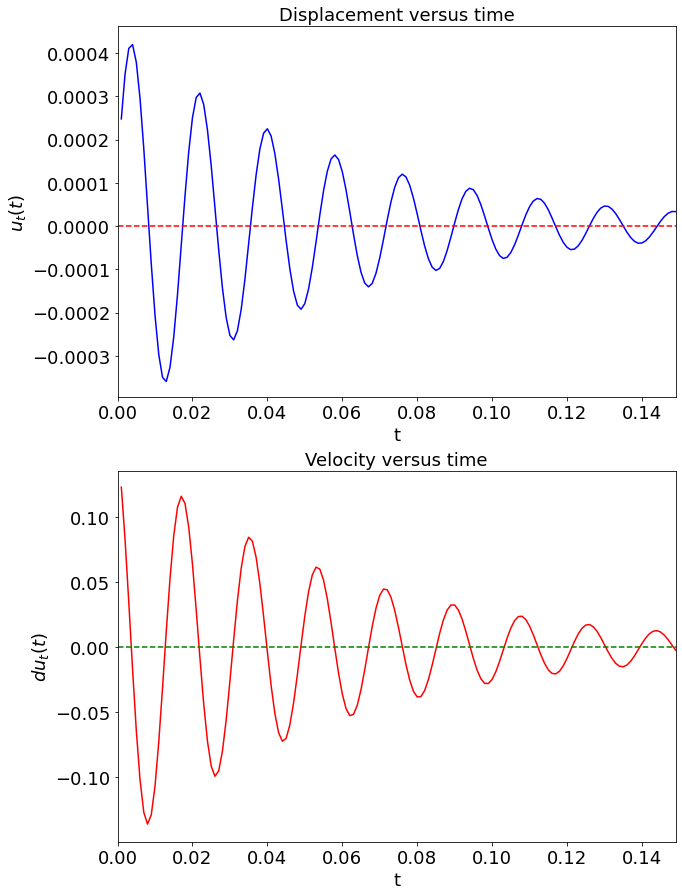

In [128]:
#-----PLOT
plt.figure(figsize=(10,15))  # plot size
fontsz = 18
lm = np.max(t2)

# colour
COLOR = 'k'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.subplot(2, 1, 1)
plt.plot(t2, u2, c='b')
plt.xlabel(r't', fontsize = fontsz)
plt.ylabel(r'$u_{t} (t)$', fontsize = fontsz)
plt.title('Displacement versus time', fontsize=fontsz)

x = [0, lm]    
y = [0, 0]
plt.plot(x, y, 'r--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(u2), 1.1*np.max(u2)])

#-------------------------

plt.subplot(2, 1, 2)
plt.plot(t2, du2, c='r')
plt.xlabel(r't', fontsize = fontsz)
plt.ylabel(r'$du_{t} (t)$', fontsize = fontsz)
plt.title('Velocity versus time', fontsize=fontsz)


x = [0, lm]    
y = [0, 0]
plt.plot(x, y, 'g--')
# plt.plot(x, np.multiply(x, 0.8), 'k--')
# plt.plot(x, np.multiply(x, 1.2), 'k--')

# change axis limit
axes = plt.gca()
axes.set_xlim([0, lm])
axes.set_ylim([1.1*np.min(du2), 1.1*np.max(du2)])

plt.show();
